# Explore here

In [2]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

import os
import shutil

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings

2025-05-14 19:34:46.696215: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-14 19:34:46.718575: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 19:34:46.933990: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 19:34:47.105039: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747251287.330799   28084 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747251287.42

In [3]:
trdata = '/workspaces/INTRO_TO_DEEP_LEARNING_JesusCastanedam/data/interim/Dogs vs Cats/training'
tsdata = '/workspaces/INTRO_TO_DEEP_LEARNING_JesusCastanedam/data/interim/Dogs vs Cats/test/unknown'


In [4]:
print('#Cat Images:', len(os.listdir('/workspaces/INTRO_TO_DEEP_LEARNING_JesusCastanedam/data/interim/Dogs vs Cats/training/cat')))
print('#Dog Images:', len(os.listdir('/workspaces/INTRO_TO_DEEP_LEARNING_JesusCastanedam/data/interim/Dogs vs Cats/training/dog')))


#Cat Images: 12500
#Dog Images: 12501


In [5]:
cat_image = keras.utils.load_img('/workspaces/INTRO_TO_DEEP_LEARNING_JesusCastanedam/data/interim/Dogs vs Cats/training/cat/0.jpg')
dog_image = keras.utils.load_img('/workspaces/INTRO_TO_DEEP_LEARNING_JesusCastanedam/data/interim/Dogs vs Cats/training/dog/0.jpg')

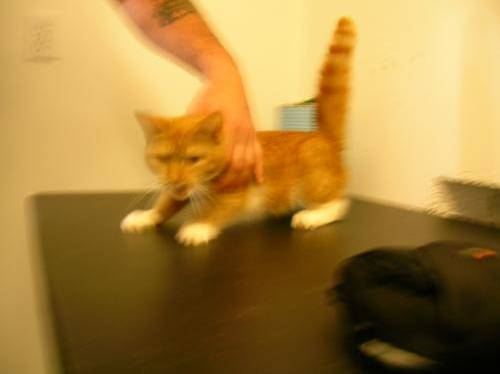

In [6]:
cat_image

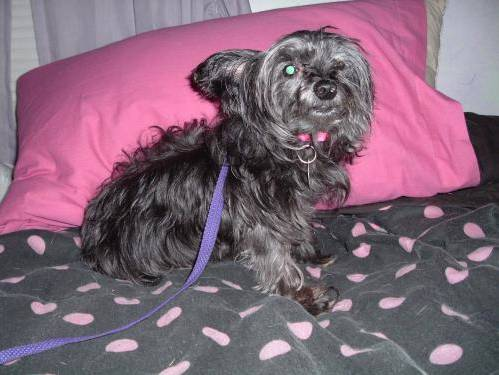

In [7]:
dog_image

In [8]:
training_dataset, validation_dataset = keras.utils.image_dataset_from_directory(
    trdata,
    validation_split=0.2,
    subset="both",
    seed=0,
    batch_size=50,
    image_size=(224, 224)
)

# Cargar dataset de prueba (sin etiquetas)
test_dataset = keras.utils.image_dataset_from_directory(
    tsdata,
    labels=None,
    batch_size=1,
    image_size=(224, 224),
    shuffle=False
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


2025-05-14 19:34:53.155336: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 12500 files.


In [9]:
training_dataset.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [10]:
training_dataset.cardinality().numpy()

np.int64(400)

In [11]:
normalization_layer = keras.layers.Rescaling(1./255)

training_dataset = training_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x: normalization_layer(x))

In [14]:
model = Sequential([
    # Bloque 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),

    # Bloque 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2)),

    # Bloque 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2)),

    # Clasificación
    Flatten(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])

In [15]:
# Compilación y entrenamiento
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(training_dataset, validation_data=validation_dataset, epochs=5)

Epoch 1/5


141/400 ━━━━━━━━━━━━━━━━━━━━ 8:46 2s/step - accuracy: 0.5507 - loss: 0.7204

: 

In [ ]:
# Cell 6: Callbacks
checkpoint_cb = ModelCheckpoint('best_model.keras', save_best_only=True)
earlystop_cb = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, mode='max')


In [ ]:
# Cell 7: Entrenamiento
history = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[checkpoint_cb, earlystop_cb]
)


In [ ]:
# Cell 8: Visualización de métricas de entrenamiento
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title("Accuracy Over Epochs")
plt.show()


In [ ]:
# Cell 9: Predicción en test y visualización
class_names = ['Cat', 'Dog']
predictions = model.predict(test_dataset)

# Mostrar las primeras 5 imágenes con su predicción
for i, image in enumerate(test_dataset.take(5)):
    pred_class = np.argmax(predictions[i])
    plt.imshow(image[0].numpy())
    plt.title(f"Prediction: {class_names[pred_class]}")
    plt.axis('off')
    plt.show()


In [ ]:
best_model = load_model('best_model.h5')

best_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


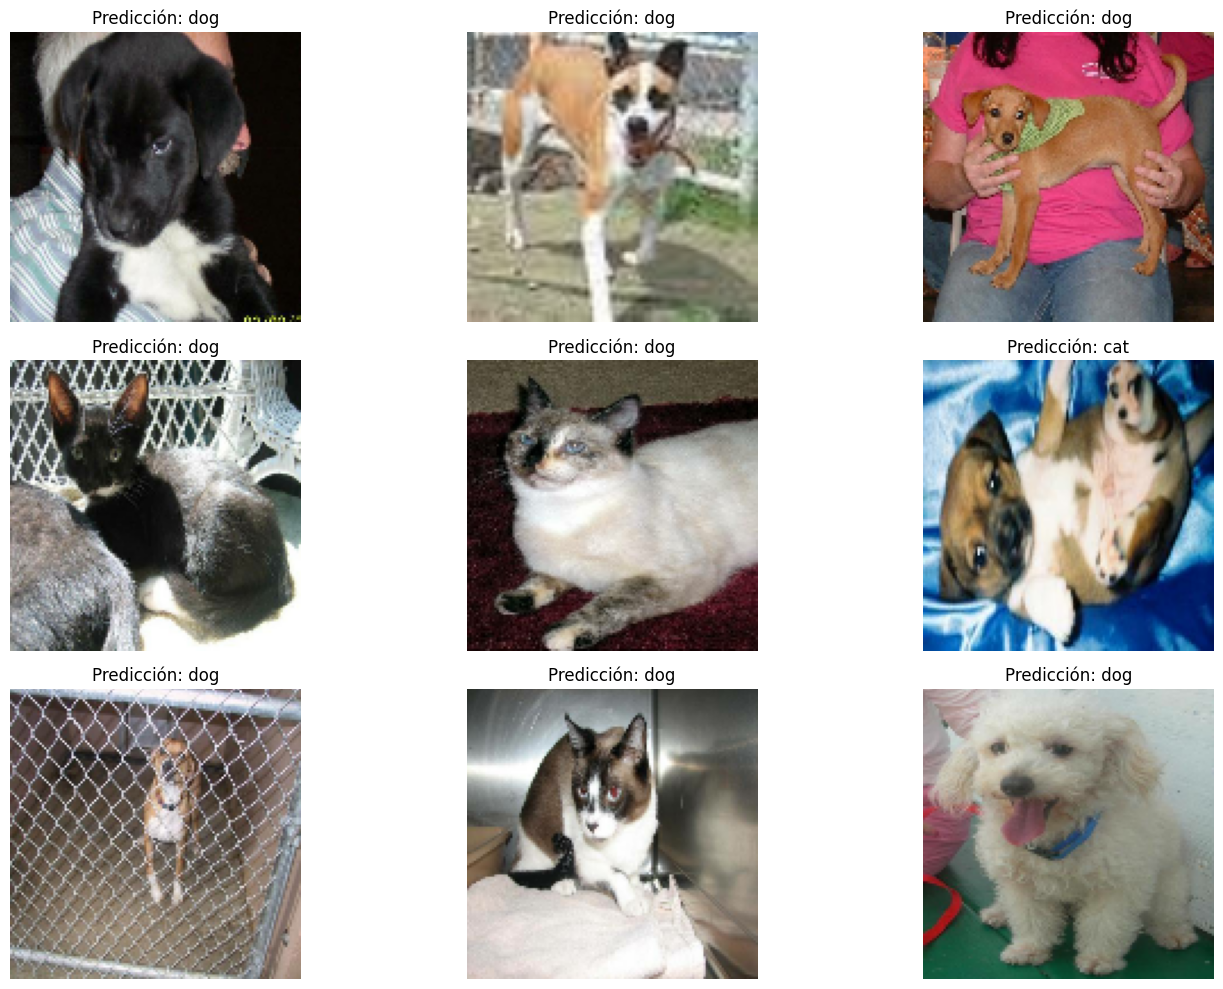

2025-05-14 18:25:01.922483: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
# Etiquetas del modelo
class_names = ['cat', 'dog']

# Obtener un batch del test dataset
for images in test_dataset.take(1):
    # Predecir
    predictions = model.predict(images)
    
    # Si es softmax (dos clases)
    if predictions.shape[1] == 2:
        predicted_labels = np.argmax(predictions, axis=1)
    else:
        predicted_labels = (predictions > 0.5).astype("int32").flatten()

    # Mostrar imágenes con predicción
    plt.figure(figsize=(15, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicción: {class_names[predicted_labels[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()